In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing datasets
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
# Merging Train and Test Data
salary_data= salary_train.append(salary_test)
salary_data.reset_index(inplace=True)
salary_data

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
salary_data.drop('index',axis=1,inplace=True)

### EDA

In [6]:
salary_data.shape

(45221, 14)

In [7]:
# describe the dataset
salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# information of the dataset
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [9]:
# check any null values is there in dataset
salary_data.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [10]:
#check any duplicated values is there in data set
salary_data.duplicated().any()

True

In [11]:
#removing the duplicated values
salary_data.drop_duplicates(inplace=True)

In [12]:
salary_data.duplicated().any()

False

In [13]:
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45215,48,Local-gov,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Numerical variables

In [14]:
numerical_features=[features for features in salary_data.columns if salary_data[features].dtype !='O']
salary_data[numerical_features].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


## categorical columns

In [15]:
categorical_features=[features for features in salary_data.columns if salary_data[features].dtype =='O']
salary_data[categorical_features].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [16]:
# view frequency counts of values in categorical variables
for var in categorical_features:
    print(salary_data[var].value_counts())

 Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64
 Married-civ-spouse       17947
 Never-married            12168
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Prof-specialty       5516
 Exec-managerial      5311
 Adm-clerical         4742
 Sales                4671
 Craft-repair    

In [17]:
# check for cardinality in categorical variables
for var in categorical_features:
    print(var,'contains',len(salary_data[var].unique()),'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


## Data Visualization 

age


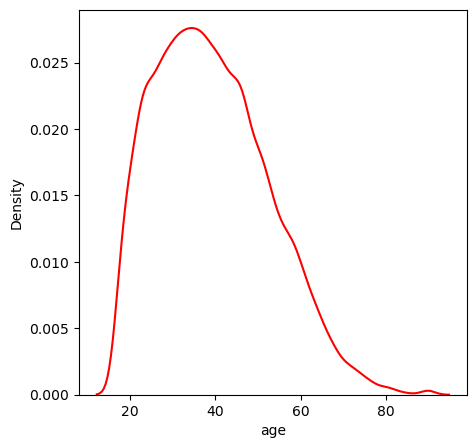

educationno


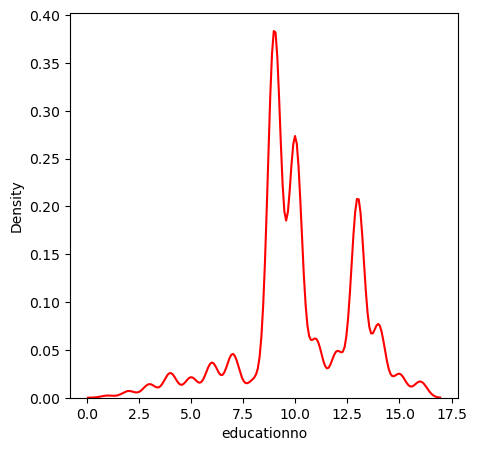

capitalgain


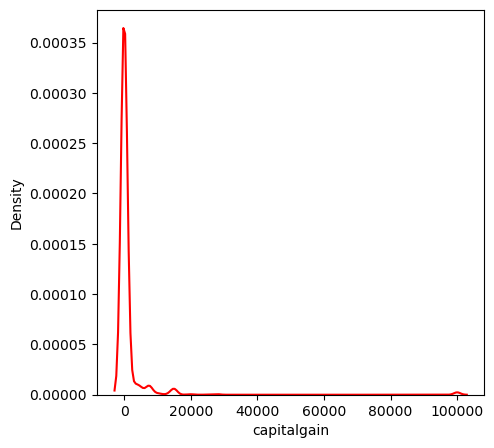

capitalloss


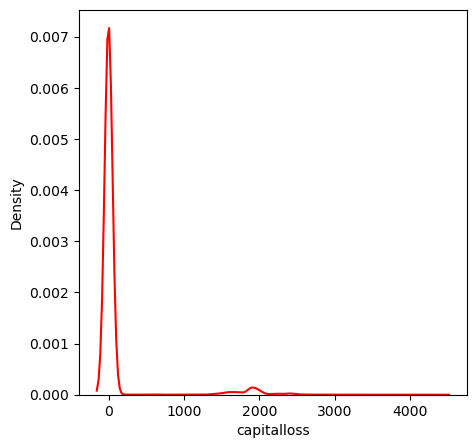

hoursperweek


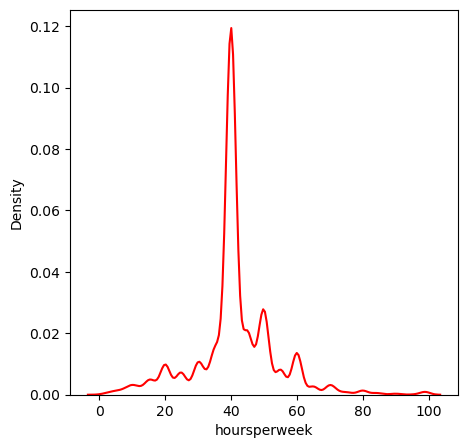

In [18]:
for i in numerical_features:
    print(i)
    plt.figure(figsize=(5,5))
    sns.kdeplot(salary_data[i],color='red')
    plt.show()

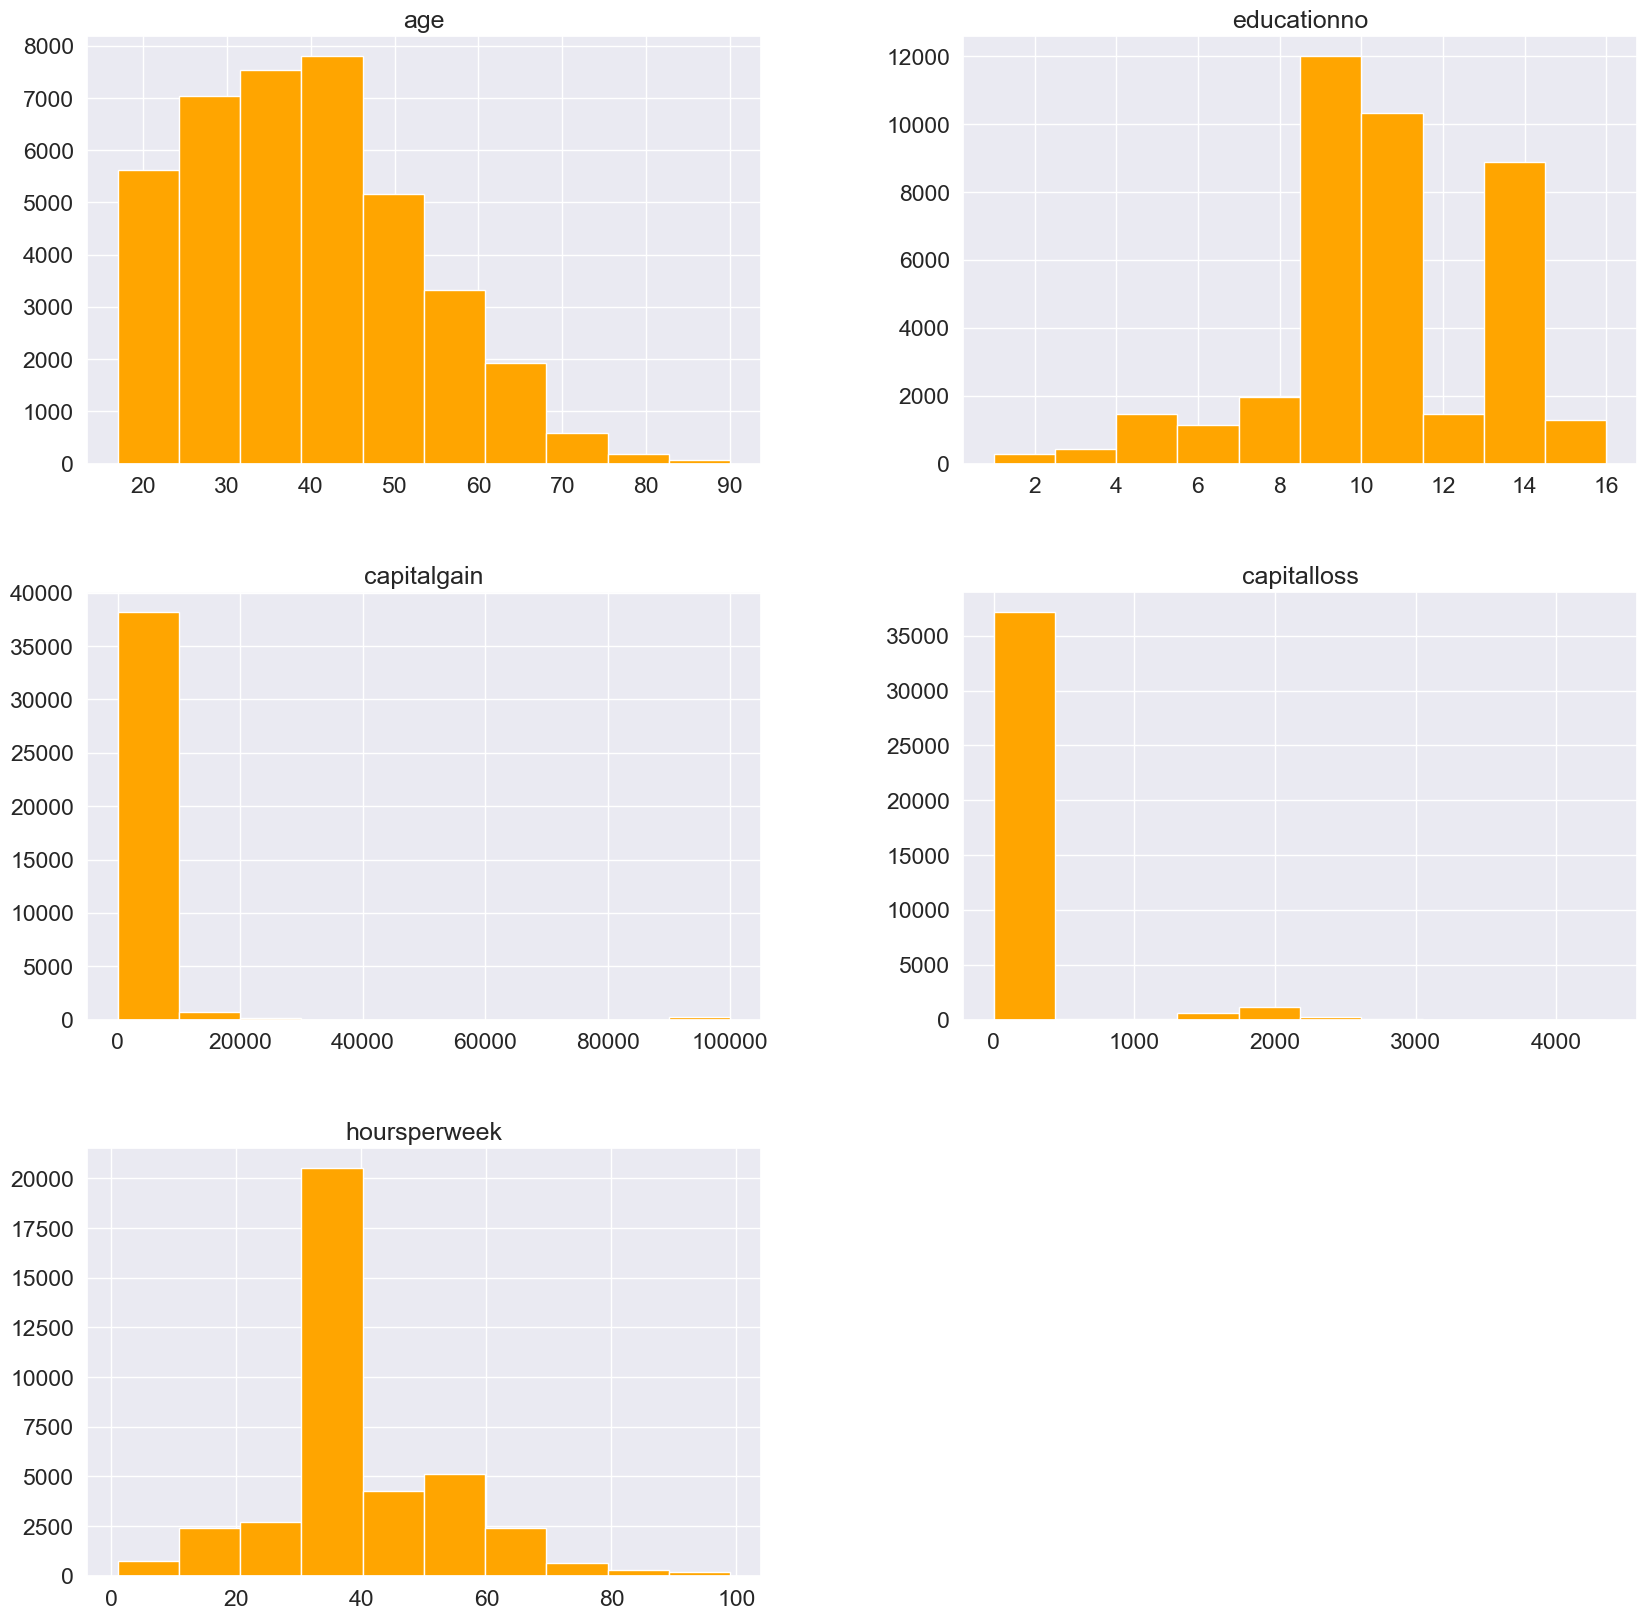

In [19]:
sns.set(style='dark',font_scale=1.5,rc={'figure.figsize':(20,20)})
salary_data.hist(bins=10,color='orange')
plt.show()

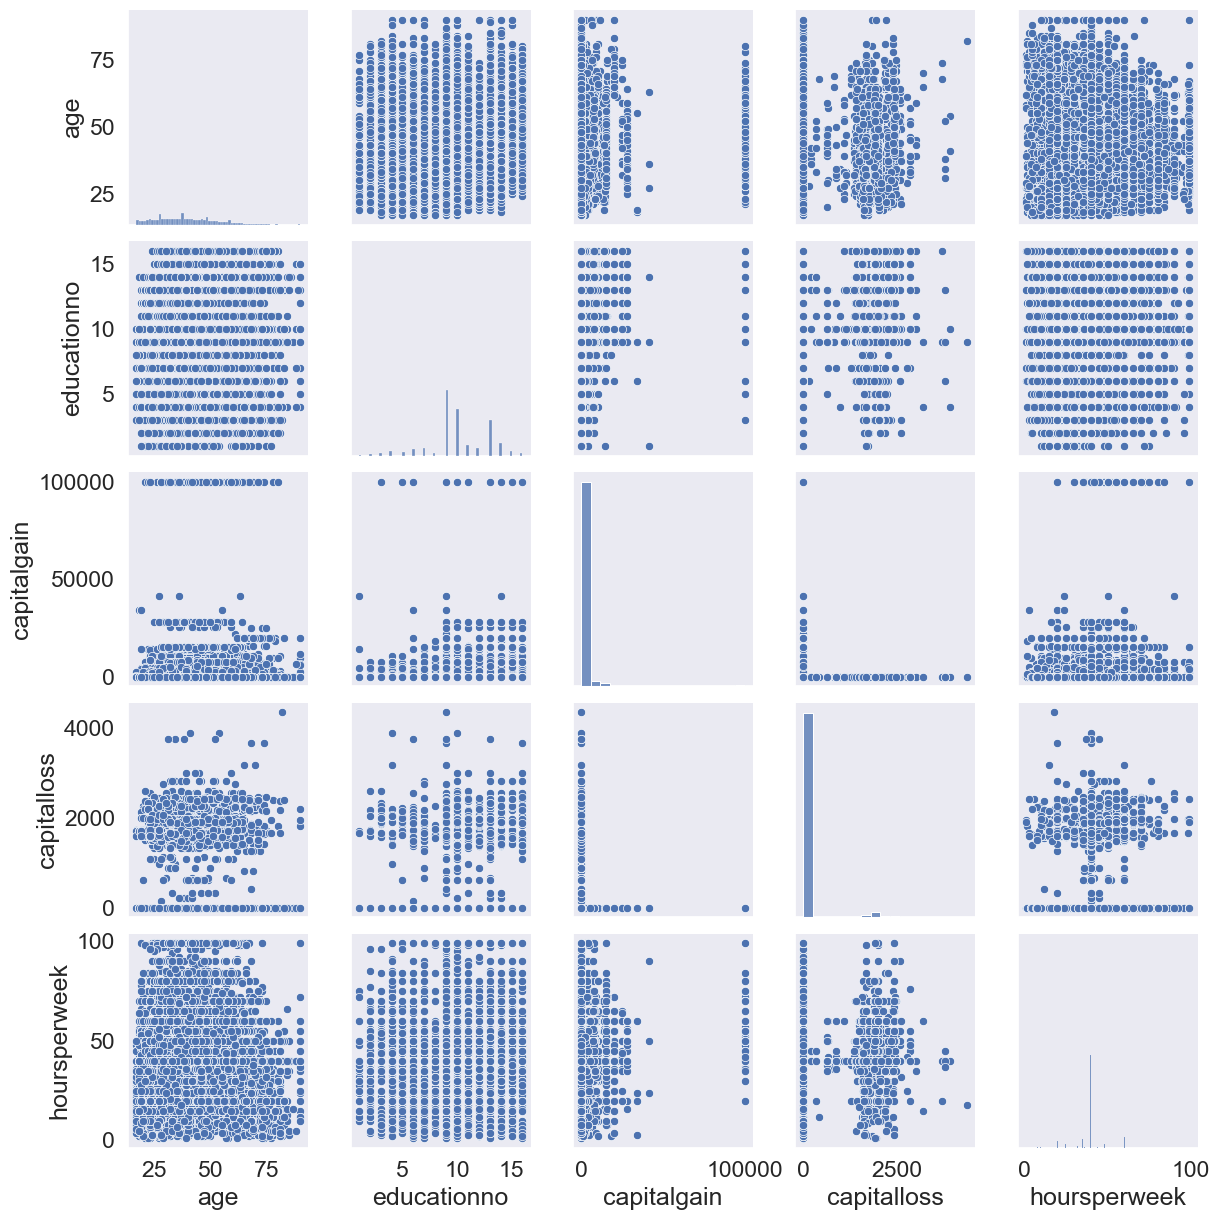

In [20]:
# pairplot
sns.pairplot(salary_data)

In [21]:
salary_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.030211,0.075495,0.049876,0.066927
educationno,0.030211,1.000000,0.129552,0.082594,0.136030
capitalgain,0.075495,0.129552,1.000000,-0.036791,0.082977
capitalloss,0.049876,0.082594,-0.036791,1.000000,0.050638
hoursperweek,0.066927,0.136030,0.082977,0.050638,1.000000


<Axes: >

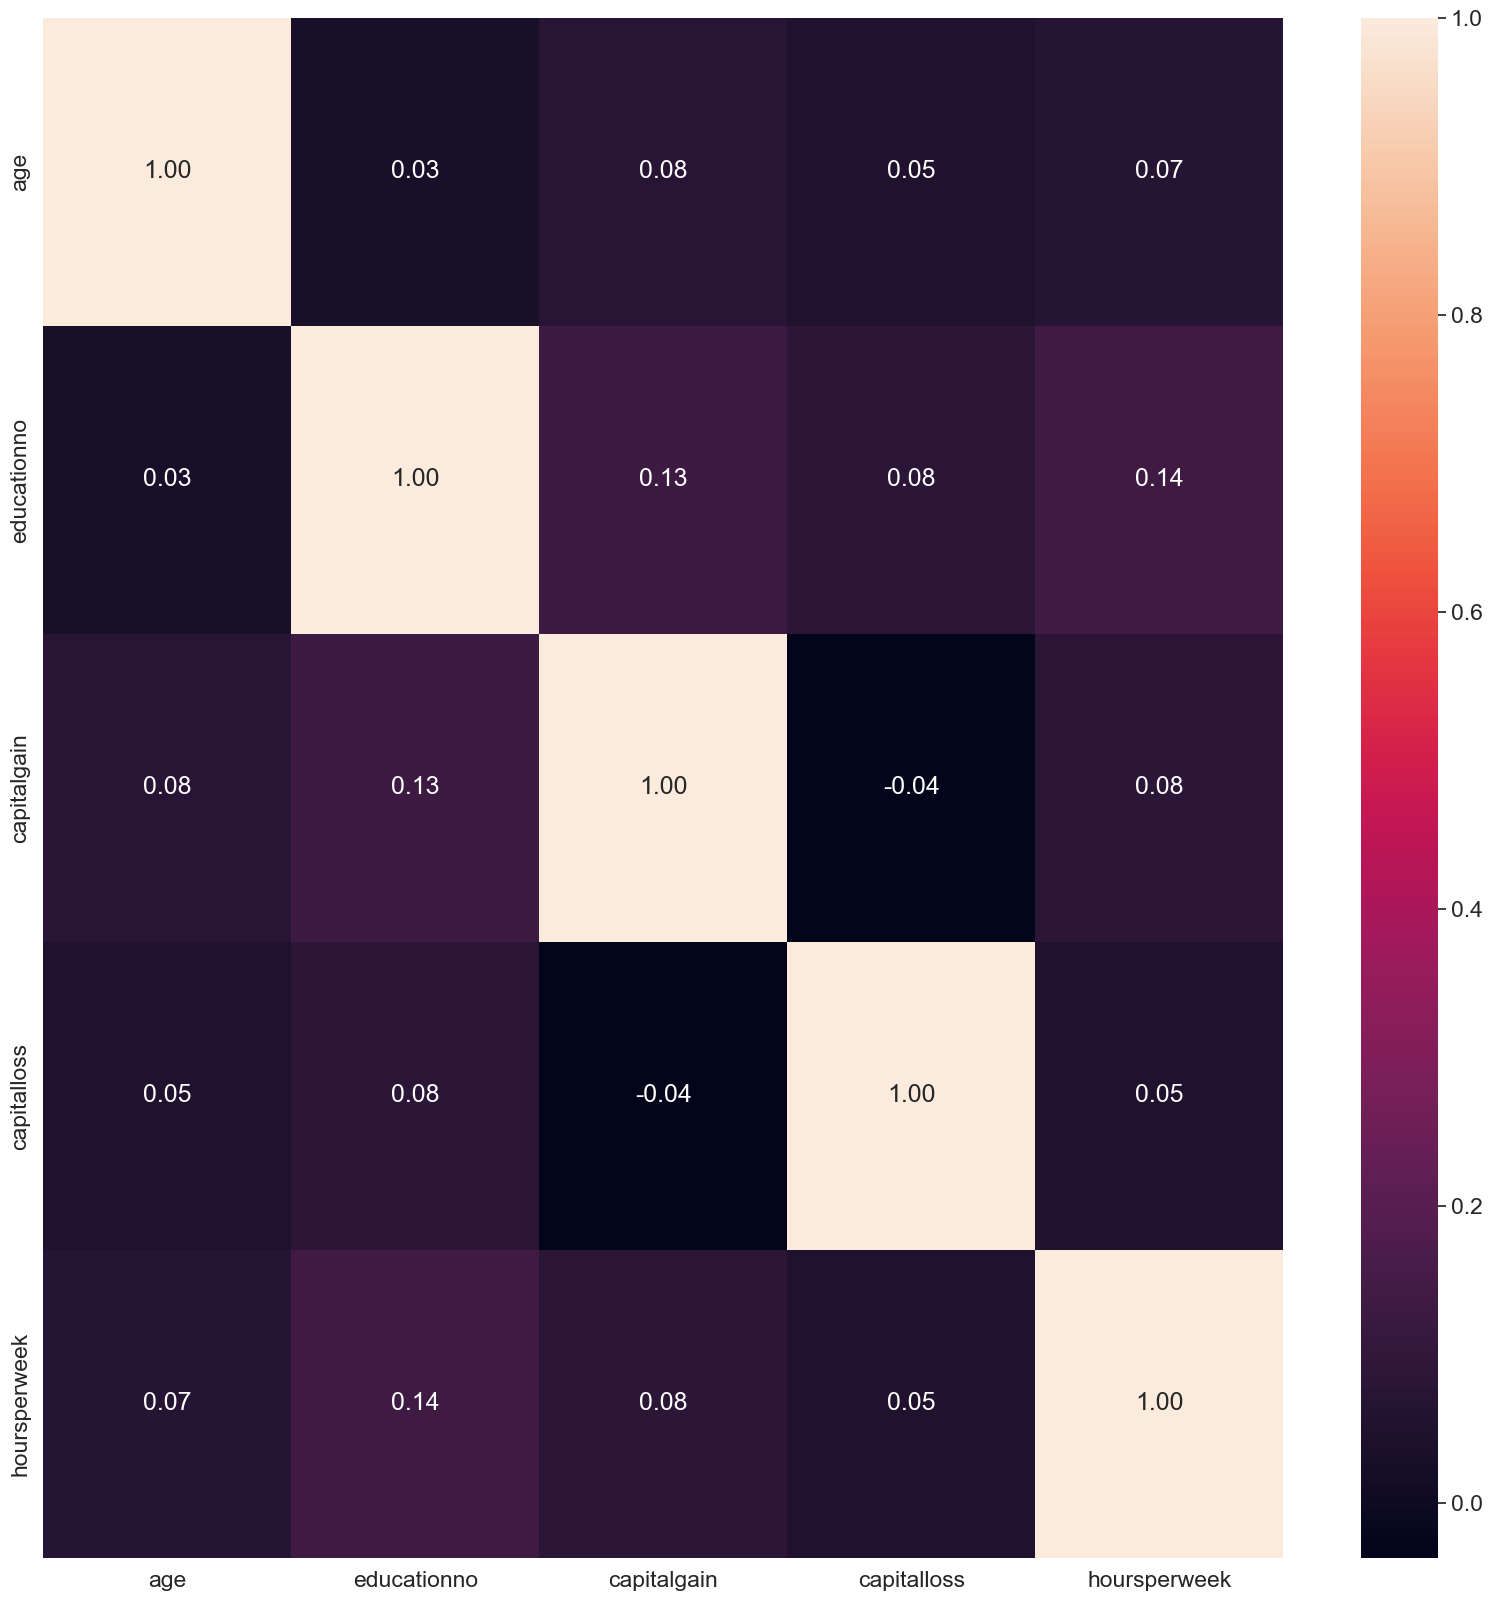

In [22]:
sns.heatmap(salary_data.corr(),annot=True,fmt='.2f')

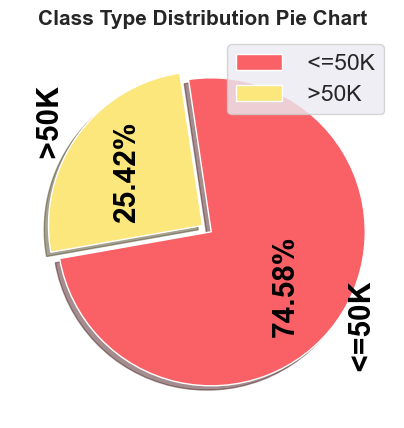

In [43]:
plt.figure(figsize = (5,5))
plt.pie(salary_data['Salary'].value_counts(),
       labels=salary_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'vertical',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 15, fontweight = 'bold')
plt.show()


# Lots of outliers present in the dataset we can't remove them because they are present in a very large quantity and can be important for model building

In [24]:
#divide the feature variables and target variables for split the data
features=salary_data.drop('Salary',axis=1)
features

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45215,48,Local-gov,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [25]:
target=salary_data[['Salary']]
target

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
45215,<=50K
45216,<=50K
45217,<=50K
45219,<=50K


## Spliting data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)

In [27]:
# check the shape of training data and testing data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27467, 13)
(11772, 13)
(27467, 1)
(11772, 1)


In [28]:
# applying onehot encoding using get dummies
x_train=pd.get_dummies(x_train)
x_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
40205,24,9,0,0,65,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25460,54,13,0,0,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
39844,42,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5336,34,9,0,0,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10439,44,13,0,0,37,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17633,37,13,0,0,5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
79,49,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12889,54,11,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15168,54,13,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:
x_test=pd.get_dummies(x_test)
x_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
41457,29,10,0,0,46,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
635,54,10,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28215,28,13,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41274,27,10,0,0,49,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
38781,32,9,0,0,60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20606,37,9,0,0,15,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
31361,41,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
21813,29,10,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15048,55,12,0,0,60,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
cols=x_train.columns

In [31]:
#applying robust sacler
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,Normalizer
rbst_scale=RobustScaler()
x_train=rbst_scale.fit_transform(x_train)
x_test=rbst_scale.fit_transform(x_test)

In [32]:
#put it array data to dataframe with columns name
x_train=pd.DataFrame(x_train,columns=[cols])
x_test=pd.DataFrame(x_test,columns=[cols])
x_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,-0.736842,-0.25,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.842105,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.210526,-0.25,0.0,0.0,2.0,0.0,0.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.210526,-0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.315789,0.75,0.0,0.0,-0.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# train a bernoulli Naive Bayes classifier on the training set
# instantiate the model
NB = BernoulliNB()

In [34]:
# fit the model
NB.fit(x_train, y_train)

y_pred = NB.predict(x_test)

y_pred

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
# check the accuracy score
accuracy_score(y_test,y_pred)

0.794682296975875

In [37]:
y_test['pred_salary']=y_pred
y_test

,Salary,pred_salary
41457,<=50K,>50K
635,<=50K,>50K
28215,<=50K,<=50K
41274,<=50K,<=50K
38781,<=50K,<=50K
...,...,...
20606,<=50K,<=50K
31361,<=50K,<=50K
21813,<=50K,<=50K
15048,<=50K,>50K


In [38]:
cm=(confusion_matrix(y_test['Salary'],y_pred))
cm

array([[7089, 1709],
       [ 708, 2266]], dtype=int64)

In [39]:
# print the scores on training and 


print('Training set score: {:.4f}'.format(NB.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(NB.score(x_test, y_test['Salary'])))

Training set score: 0.7911
Test set score: 0.7947


In [40]:
# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test['Salary'], y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7089 1709]
 [ 708 2266]]

True Positives(TP) =  7089

True Negatives(TN) =  2266

False Positives(FP) =  1709

False Negatives(FN) =  708


<Axes: >

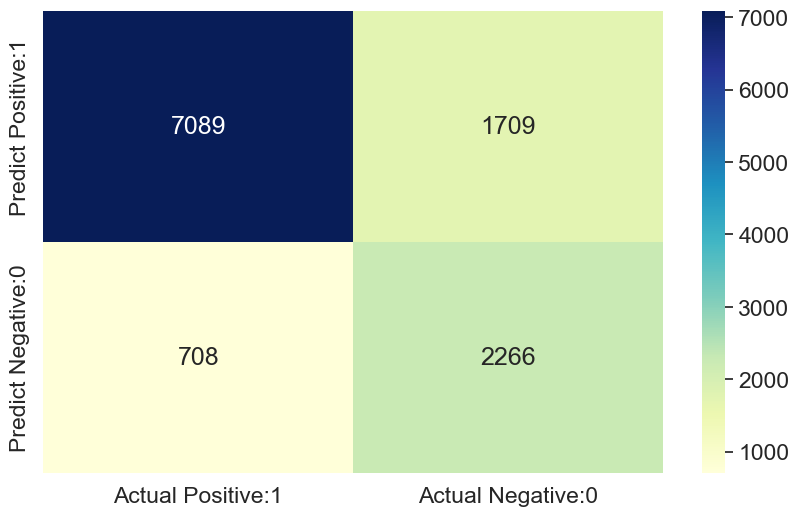

In [41]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(10,6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [42]:
print(classification_report(y_test['Salary'],y_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.81      0.85      8798
        >50K       0.57      0.76      0.65      2974

    accuracy                           0.79     11772
   macro avg       0.74      0.78      0.75     11772
weighted avg       0.82      0.79      0.80     11772



## Naive bayes better perform when the features are Dependent each other 